<a href="https://colab.research.google.com/github/vishal0820/LoanTap-CaseStudy/blob/main/LoanTap_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>LoanTap Case Study</center>

# Introduction
LoanTap is at the forefront of offering tailored financial solutions to milennials. Their innovative approach seeks to harness data science for refining their credit underwriting process. The focus here is the Personal Loan segment. A deep dive into the dataset can reveal patterns in borrower behaviour and creditworthiness. Analyzing this dataset can provide crucial insights into the financial behaviours, spending habits and potential risk associated with each borrower. The insights gained can optimize loan disbursal, balancing customer outreach with risk management.
### What is expected
Assuming you are a data scientist at LoanTap, you are tasked with analyzing the dataset to determine the creditworthiness of potential borrowers. Your ultimate objective is to build a logistic regression model, evaluate its performance, and provide actionable insights for the underwriting process.

# 1. Data
The analysis was done on the data located locally.


# 2. Libraries
Below are the libraries required

In [ ]:
# libraries to analyze data
import numpy as np
import pandas as pd

# libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.pipeline import make_pipeline

from imblearn.over_sampling import SMOTE

# 3. Data Loading
Loading the data into Pandas dataframe for easily handling of data

In [ ]:
# read the file into a pandas dataframe
customer_df = pd.read_csv('LoanTapData.csv')
df = customer_df
# look at the datatypes of the columns
print('*************************************************')
print(df.info())
print('*************************************************\n')
print('*************************************************')
print(f'Shape of the dataset is {df.shape}')
print('*************************************************\n')
print('*************************************************')
print(f'Number of nan/null values in each column: \n{df.isna().sum()}')
print('*************************************************\n')
print('*************************************************')
print(f'Number of unique values in each column: \n{df.nunique()}')
print('*************************************************\n')
print('*************************************************')
print(f'Duplicate entries: \n{df.duplicated().value_counts()}')
print('*************************************************')

*************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  ti

In [ ]:
# look at the top 5 rows
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


Not all columns are visible, so looking at groups of columns

In [ ]:
df[df.columns[10:20]]

,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal
0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0
1,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0
2,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0
3,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0
4,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0
...,...,...,...,...,...,...,...,...,...,...
396025,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0
396026,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0
396027,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0
396028,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0


In [ ]:
df[df.columns[20:]]

,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...
396025,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


### Insight
- There are **396030** entries with 27 columns
- There are **22927 null/missing values in *emp_title*, 18301 in *emp_length*, 1756 in *title*, 276 in *revol_util*, 37795 in *mort_acc* and 535 in *pub_rec_bankruptcies***
- There are no **duplicates**
- Based on the number of unique values in each column and their datatype, the columns ***term, grade, emp_length, home_ownership, verification_status, loan_status, purpose, initial_list_status*** and  ***application_type*** can be converted to **categorical** datatype
- ***issue_d*** and ***earliest_cr_line*** has date values so can be convered to **datetime**
- The column ***sub_grade*** can be dropped as its info is already captured in column ***grade***
- The columns ***term*** and ***emp_length*** have space, special characters, alphanumeric mix.
- Replace "36 months" with "short" and "60 months" with "long" in ***term*** column
- Remove "year/years", replacing "< 1" with "0" and replacing "10+" with "10" in ***emp_length*** column. Then convert ***emp_length*** column to **categorical** datatype
- Extract zip code from ***address*** column and drop address column

In [ ]:
# Convert to category
categorical_columns = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'initial_list_status', 'application_type']
df[categorical_columns] = df[categorical_columns].astype('category')

# Convert to datetime
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y')

# Drop "grade" column
df.drop(columns=['sub_grade'], inplace=True)

# Rename the values in 'term' column
df['term'].replace({' 36 months' : 'short', ' 60 months' : 'long'}, inplace=True)

# Rename employee_length column values
df['emp_length'] = df['emp_length'].replace({'< 1 year':'0 year'})
df['emp_length'] = df['emp_length'].str.replace(r'\D', '', regex=True)
df['emp_length'] = df['emp_length'].astype('category')

# Extract zip code from address
df['zip_code'] = df['address'].str[-5:].str.split().str[0].astype('category')
df.drop(columns='address', inplace=True)
print(f'Number of nan/null values in zip_code column: \n{df.zip_code.isna().sum()}')

df.info()

Number of nan/null values in zip_code column: 
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             396030 non-null  float64       
 1   term                  396030 non-null  category      
 2   int_rate              396030 non-null  float64       
 3   installment           396030 non-null  float64       
 4   grade                 396030 non-null  category      
 5   emp_title             373103 non-null  object        
 6   emp_length            377729 non-null  category      
 7   home_ownership        396030 non-null  category      
 8   annual_inc            396030 non-null  float64       
 9   verification_status   396030 non-null  category      
 10  issue_d               396030 non-null  datetime64[ns]
 11  loan_status           396030 non-null  category      
 12  purpose  

# 4. Exploratory Data Analysis

## 4.1. Handling null values
***emp_title*** has 22927, ***emp_length*** has 18301, ***title*** has 1756, ***revol_util*** has 276, ***mort_acc*** has 37795 and ***pub_rec_bankruptcies*** has 535 null values


- Columns ***emp_title*** and ***title*** can be **dropped** as they would not have an effect on the loan approval
- Null values in ***revol_util*** and ***pub_rec_bankruptcies*** are small in number and hence can be dropped

In [ ]:
df.drop(columns=['emp_title', 'title'], inplace=True)
df.dropna(subset = ['revol_util', 'pub_rec_bankruptcies'], inplace=True)

- Let us check the distribution of remaining features before deciding on how to handle the null values

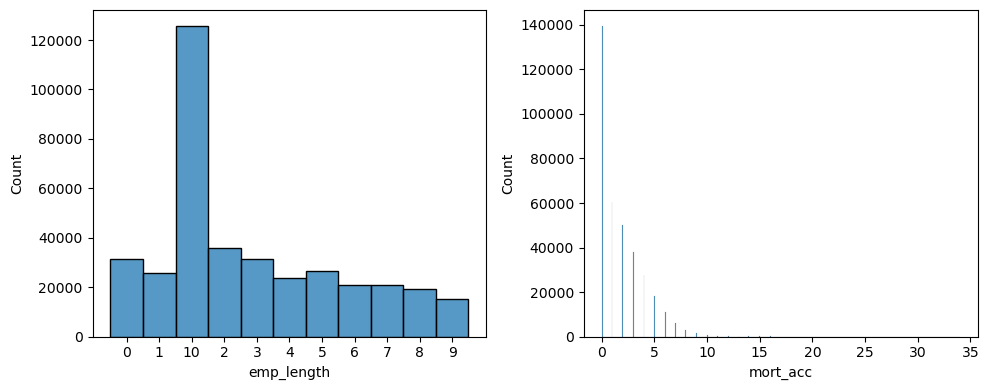

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,4))
sns.histplot(ax = axs[0], data=df, x = 'emp_length')
sns.histplot(ax = axs[1], data=df, x = 'mort_acc')
fig.tight_layout()
plt.show()

- ***mort_acc*** is the number of mortgae accounts out of the ***total_acc***. So I will replace the null values with **"mode"** of ***mort_acc*** for different ***total_acc***
- For ***emp_length***, I will use knn imputer to fill the missing data

In [ ]:
mode_mort_acc_df = df.groupby('total_acc')['mort_acc'].agg(lambda x: pd.Series.mode(x)[0])

def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return mode_mort_acc_df[total_acc]
    else:
        return mort_acc

df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']), axis=1)

In [ ]:
imputer = KNNImputer(n_neighbors=5)
df['emp_length']=imputer.fit_transform(df[['emp_length']])
df['emp_length'] = df['emp_length'].astype('category')

In [ ]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
zip_code                0
dtype: int64

**There are no null values now**

## 4.2. Detecting outliers
### 4.2.1. Outliers for every continuous variable

In [ ]:
# helper function to detect outliers using IQR method
def detectOutliers_iqr(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    lower_outliers = df[df<(q1-1.5*iqr)]
    higher_outliers = df[df>(q3+1.5*iqr)]
    return lower_outliers, higher_outliers

In [ ]:
# helper function to detect outliers using standard deviation method
def detectOutliers_std(df):
    mean = df.mean()
    std = df.std()
    upper_limit = mean+(3*std)
    lower_limit = mean-(3*std)
    lower_outliers = df[df<lower_limit]
    higher_outliers = df[df>upper_limit]
    return lower_outliers, higher_outliers

In [ ]:
numerical_columns = df.select_dtypes(include=np.number).columns
column_outlier_dictionary = {}
for column in numerical_columns:
    lower_outliers, higher_outliers = detectOutliers_iqr(df[column])
    column_outlier_dictionary[column] = [lower_outliers, higher_outliers]
    #print('*'*50)
    #print(f'Outliers of \'{column}\' column are:')
    #print("Lower outliers:\n", lower_outliers)
    #print("Higher outliers:\n", higher_outliers)
    #print('*'*50, end="\n")

In [ ]:
for key, value in column_outlier_dictionary.items():
    print(f'The column \'{key}\' has {len(value[0]) + len(value[1])} outliers')

The column 'loan_amnt' has 190 outliers
The column 'int_rate' has 3144 outliers
The column 'installment' has 11114 outliers
The column 'annual_inc' has 16649 outliers
The column 'dti' has 275 outliers
The column 'open_acc' has 10297 outliers
The column 'pub_rec' has 57730 outliers
The column 'revol_bal' has 21205 outliers
The column 'revol_util' has 12 outliers
The column 'total_acc' has 8491 outliers
The column 'mort_acc' has 6837 outliers
The column 'pub_rec_bankruptcies' has 45111 outliers


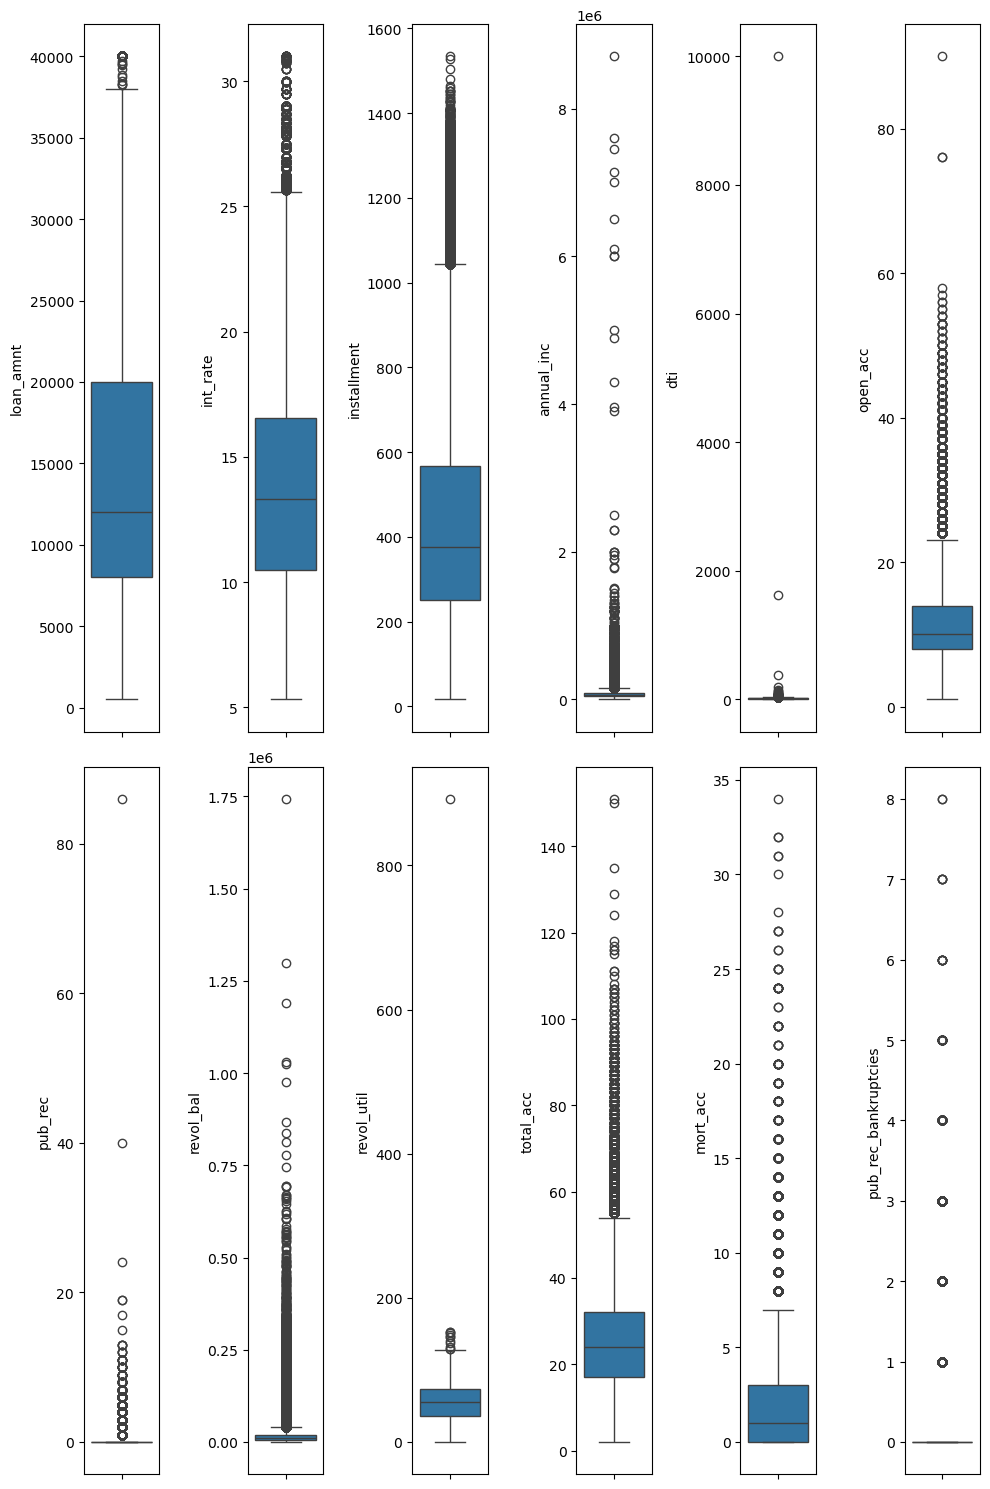

In [ ]:
num_cols = 6
num_rows = int(np.ceil(len(numerical_columns)/num_cols))
fig, axs = plt.subplots(num_rows,num_cols,figsize=(10,15))
for idx in range(len(numerical_columns)):
    ax = plt.subplot(num_rows, num_cols, idx+1)
    sns.boxplot(ax = ax, data=df, y = numerical_columns[idx])
plt.tight_layout()
plt.show()

In [ ]:
numerical_columns = df.select_dtypes(include=np.number).columns
numerical_columns = list(numerical_columns)
numerical_columns.remove('pub_rec')
numerical_columns.remove('pub_rec_bankruptcies')
numerical_columns = pd.core.indexes.base.Index(numerical_columns)
column_outlier_dictionary = {}
for column in numerical_columns:
    lower_outliers, higher_outliers = detectOutliers_std(df[column])
    column_outlier_dictionary[column] = [lower_outliers, higher_outliers]
    #print('*'*50)
    #print(f'Outliers of \'{column}\' column are:')
    #print("Lower outliers:\n", lower_outliers)
    #print("Higher outliers:\n", higher_outliers)
    #print('*'*50, end="\n")

In [ ]:
for key, value in column_outlier_dictionary.items():
    print(f'The column \'{key}\' has {len(value[0]) + len(value[1])} outliers')

The column 'loan_amnt' has 184 outliers
The column 'int_rate' has 754 outliers
The column 'installment' has 5042 outliers
The column 'annual_inc' has 3190 outliers
The column 'dti' has 12 outliers
The column 'open_acc' has 4873 outliers
The column 'revol_bal' has 4771 outliers
The column 'revol_util' has 16 outliers
The column 'total_acc' has 3396 outliers
The column 'mort_acc' has 6837 outliers


### 4.2.2. Remove the outliers

- Based on the boxplot, the number of outliers using IQR method and standard deviation method, I will remove the outliers using the standard deviation method except for columns ***pub_rec*** and ***pub_rec_bankruptcies*** which will be removed based on manual check.

In [ ]:
remove_outliers = True
if True == remove_outliers:
    master_index = pd.core.indexes.base.Index([])
    for key, value in column_outlier_dictionary.items():
        lower_outliers = value[0]
        higher_outliers = value[1]
        master_index = master_index.union(lower_outliers.index).union(higher_outliers.index)
    df.drop(master_index, inplace=True)
else:
    print('Not removing any outliers')

In [ ]:
df['pub_rec'].value_counts()

pub_rec
0.0     315552
1.0      47129
2.0       5107
3.0       1424
4.0        481
5.0        218
6.0        108
7.0         47
8.0         31
10.0        11
9.0         10
11.0         6
13.0         4
12.0         4
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: count, dtype: int64

In [ ]:
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    327200
1.0     40774
2.0      1716
3.0       332
4.0        75
5.0        30
6.0         6
7.0         4
8.0         2
Name: count, dtype: int64

In [ ]:
df = df[df['pub_rec'] < 11]
df = df[df['pub_rec_bankruptcies'] < 6]

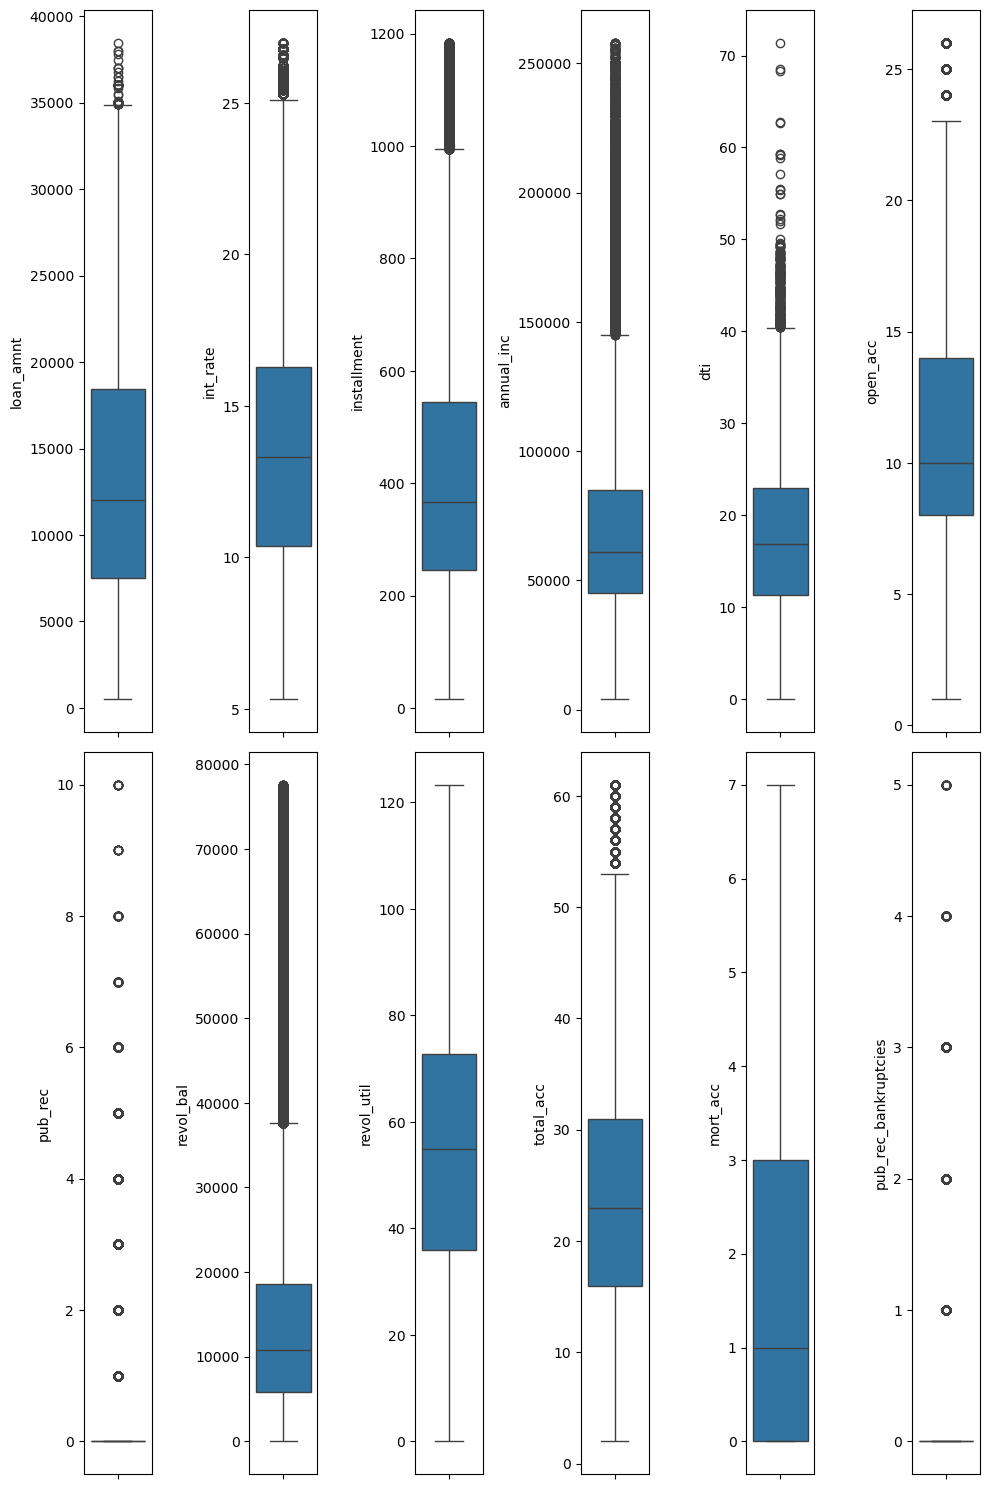

In [ ]:
numerical_columns = df.select_dtypes(include=np.number).columns
num_cols = 6
num_rows = int(np.ceil(len(numerical_columns)/num_cols))
fig, axs = plt.subplots(num_rows,num_cols,figsize=(10,15))
for idx in range(len(numerical_columns)):
    ax = plt.subplot(num_rows, num_cols, idx+1)
    sns.boxplot(ax = ax, data=df, y = numerical_columns[idx])
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370106 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             370106 non-null  float64       
 1   term                  370106 non-null  category      
 2   int_rate              370106 non-null  float64       
 3   installment           370106 non-null  float64       
 4   grade                 370106 non-null  category      
 5   emp_length            370106 non-null  category      
 6   home_ownership        370106 non-null  category      
 7   annual_inc            370106 non-null  float64       
 8   verification_status   370106 non-null  category      
 9   issue_d               370106 non-null  datetime64[ns]
 10  loan_status           370106 non-null  category      
 11  purpose               370106 non-null  category      
 12  dti                   370106 non-null  float64       
 13  earl

## Insight
- The number of columns reduced to **370106** from the original 396030 rows

## 4.3. Univariate analysis

### 4.3.1. Numerical Variables

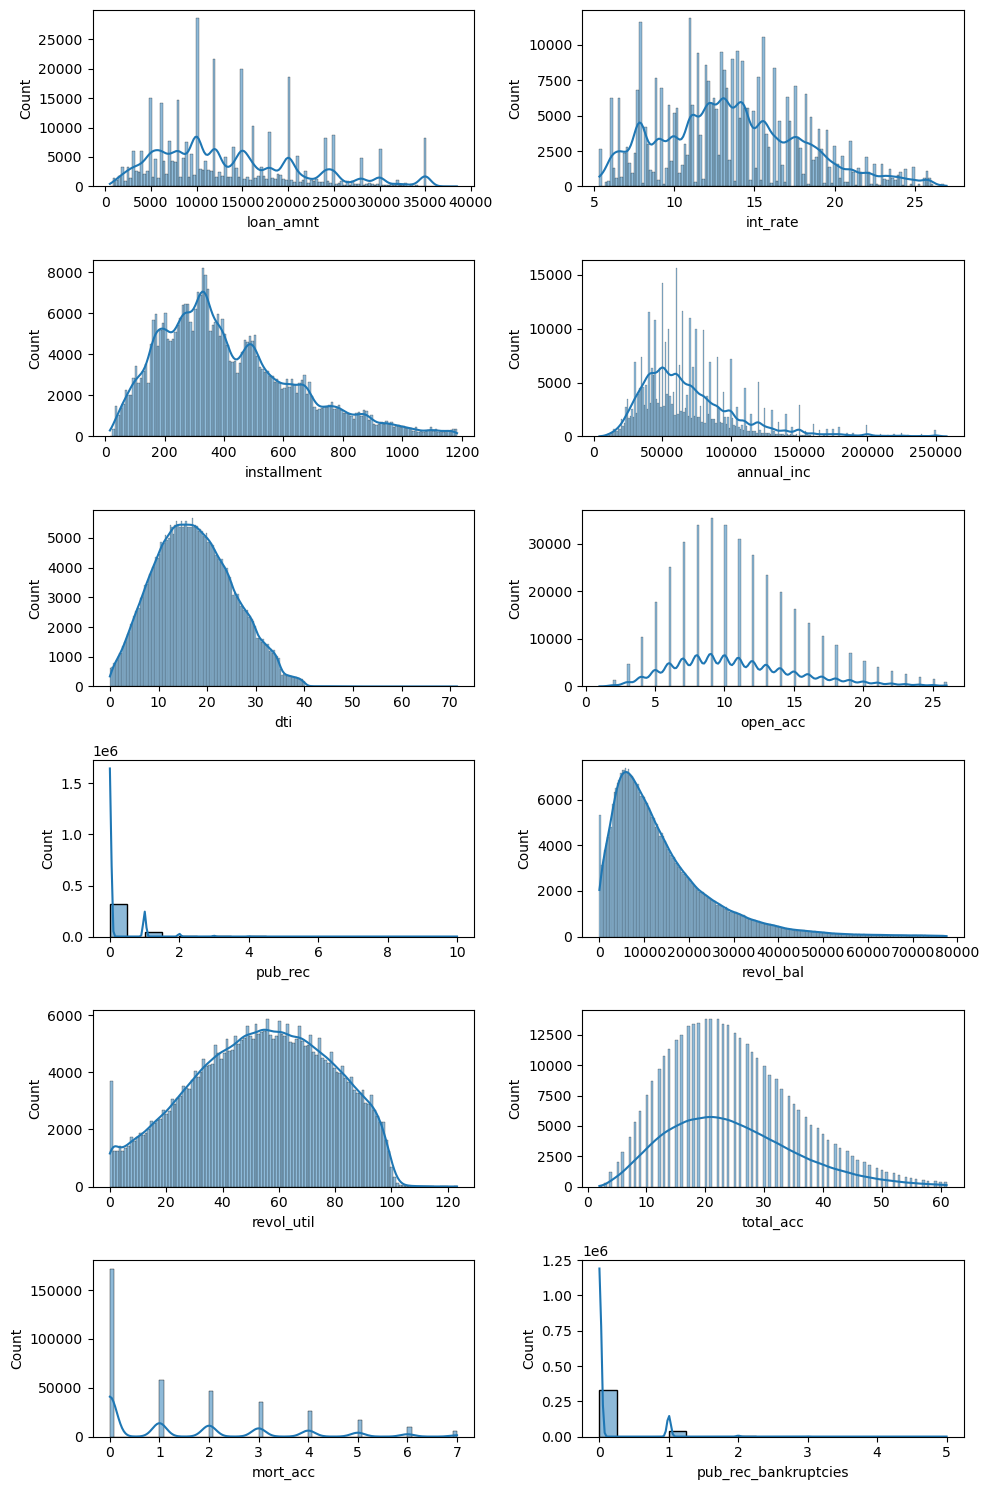

In [ ]:
num_cols = 2
num_rows = int(np.ceil(len(numerical_columns)/num_cols))
fig, axs = plt.subplots(num_rows,num_cols,figsize=(10,15))
for idx in range(len(numerical_columns)):
    ax = plt.subplot(num_rows, num_cols, idx+1)
    sns.histplot(ax = ax, data=df, x = numerical_columns[idx], kde=True)
plt.tight_layout()
plt.show()

## Insight
- Most of the features are right skewed except for ***revol_util*** which is slightly left skewed

### 4.3.2. Categorical Variables

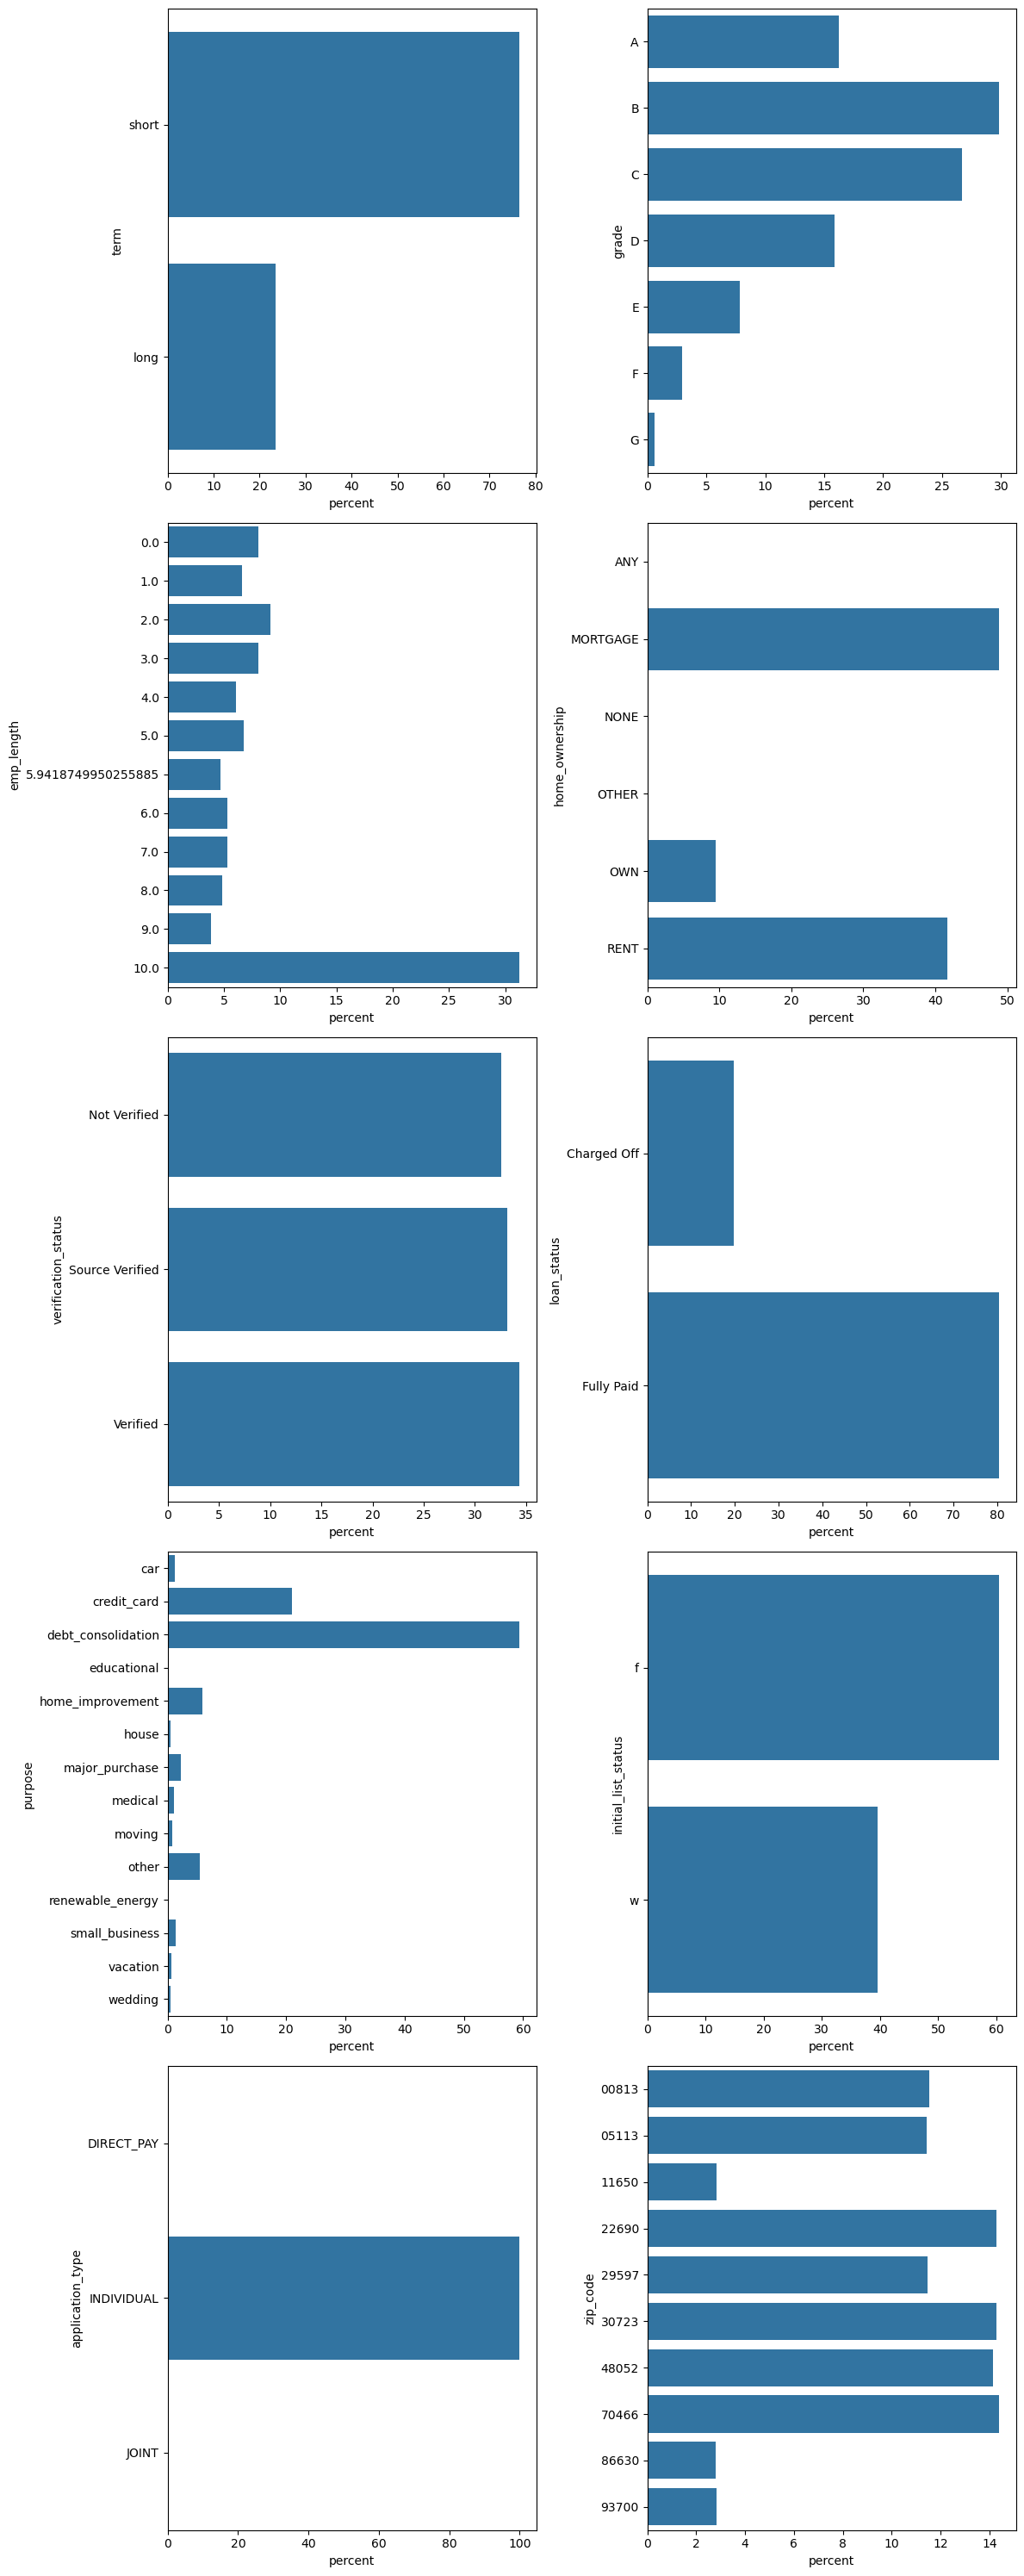

In [ ]:
categorical_columns = df.select_dtypes(include='category').columns
num_cols = 2
num_rows = int(np.ceil(len(categorical_columns)/num_cols))
fig, axs = plt.subplots(num_rows,num_cols,figsize=(12,30))
for idx in range(len(categorical_columns)):
    ax = plt.subplot(num_rows, num_cols, idx+1)
    sns.countplot(ax = ax, data=df, y = categorical_columns[idx], stat='percent')
plt.tight_layout()
plt.show()

## Insight
- Most of the loan is taken for a short **term** which is for **3 years**
- Maximum loan are assigned the **grade B** followed by grade C
- Maximum loan are taken by borrowers whose employement tenure is more than **10 years**
- Maximum loan are taken by borrowers whose house is **mortgaged** followed by those whose who are in **rented** house
- Most of the loan is **fully_paid**
- Most of the loan is taken for **debt consolidation** followed by **credit card**
- Majority of the loan is taken by **individuals**

## 4.4. Bivariate analysis

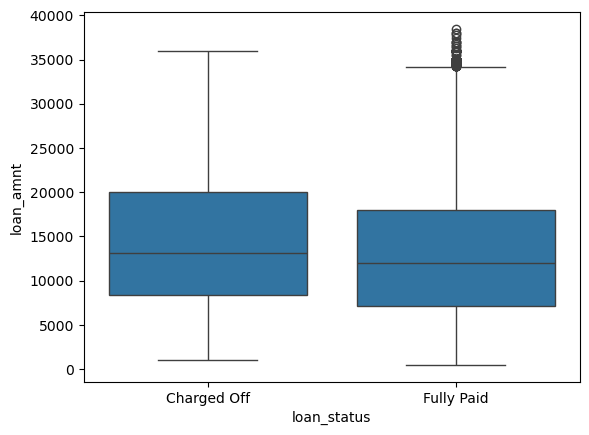

In [ ]:
sns.boxplot(data=df, x='loan_status', y='loan_amnt')
plt.show()

## Insight
- The **median** of the **loan amount** slighly **higher** for loans which were **charged off**

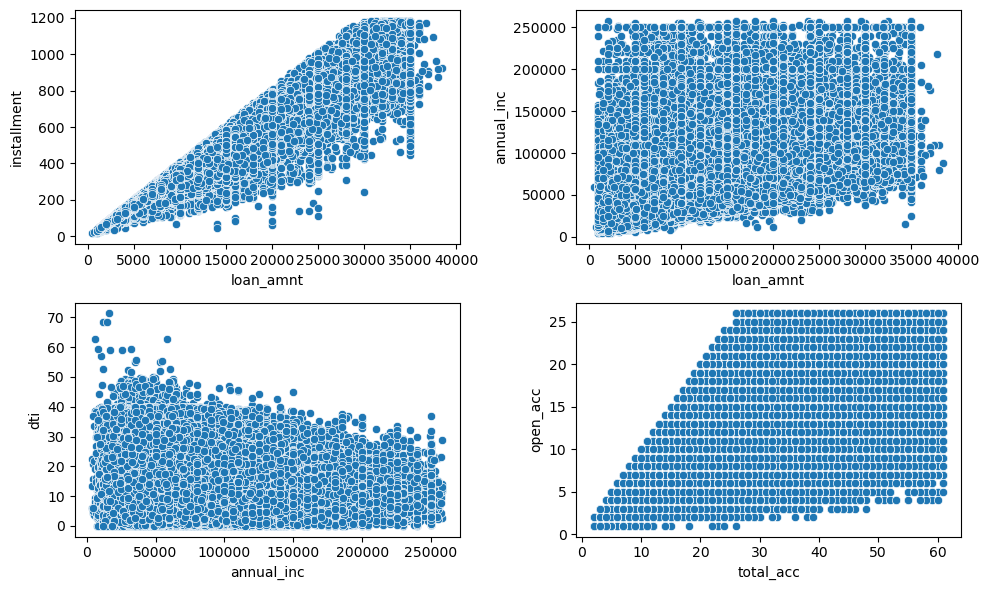

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(10,6))
sns.scatterplot(ax=axs[0,0], data=df, x='loan_amnt', y='installment')
sns.scatterplot(ax=axs[0,1], data=df, x='loan_amnt', y='annual_inc')
sns.scatterplot(ax=axs[1,0], data=df, x='annual_inc', y='dti')
sns.scatterplot(ax=axs[1,1], data=df, x='total_acc', y='open_acc')
fig.tight_layout()
plt.show()

## Insight
- It is very clear from the plot that, in general, the **installment increases** as the **loan amount** increases
- It is very obvious that people with **higher income** can afford to take **higher loan**
- As **income** increases **debt to income ratio** reduces
- Most of the borrower's accounts are active accounts

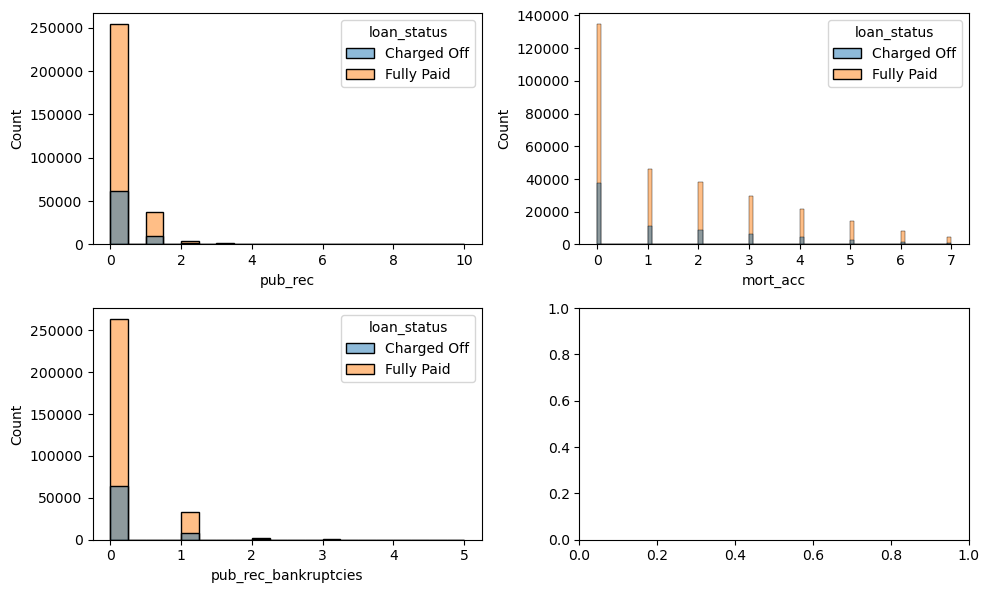

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(10,6))
sns.histplot(ax=axs[0,0], data=df, x='pub_rec', hue='loan_status')
sns.histplot(ax=axs[0,1], data=df, x='mort_acc', hue='loan_status')
sns.histplot(ax=axs[1,0], data=df, x='pub_rec_bankruptcies', hue='loan_status')
fig.tight_layout()
plt.show()

## Insight
- I will group ***pub_rec*** into 2 groups: **0** for having 0 negative records and **1** for having more than 0 negative records
- Same for ***mort_acc*** and ***pub_rec_bankruptcies***

In [ ]:
group_0_list = [0.0]
pub_rec_list = list(df['pub_rec'].explode().unique())
group_1_list = list(set(pub_rec_list) - set(group_0_list))
df['any_neg_rec'] = df['pub_rec'].replace(group_0_list, 0)
df['any_neg_rec'] = df['any_neg_rec'].replace(group_1_list, 1)
df['any_neg_rec'] = df['any_neg_rec'].astype('category')

group_0_list = [0.0]
pub_rec_list = list(df['mort_acc'].explode().unique())
group_1_list = list(set(pub_rec_list) - set(group_0_list))
df['any_mort'] = df['mort_acc'].replace(group_0_list, 0)
df['any_mort'] = df['any_mort'].replace(group_1_list, 1)
df['any_mort'] = df['any_mort'].astype('category')

group_0_list = [0.0]
pub_rec_list = list(df['pub_rec_bankruptcies'].explode().unique())
group_1_list = list(set(pub_rec_list) - set(group_0_list))
df['any_bankruptcies'] = df['pub_rec_bankruptcies'].replace(group_0_list, 0)
df['any_bankruptcies'] = df['any_bankruptcies'].replace(group_1_list, 1)
df['any_bankruptcies'] = df['any_bankruptcies'].astype('category')

df.drop(columns = ['pub_rec', 'mort_acc', 'pub_rec_bankruptcies'], inplace=True)

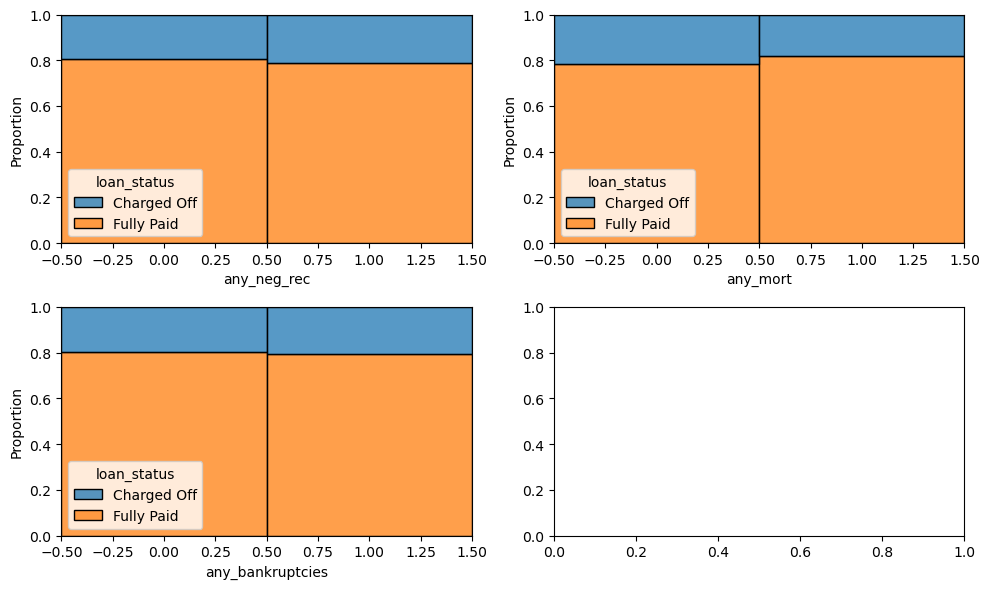

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(10,6))
sns.histplot(ax=axs[0,0], data=df, x='any_neg_rec', hue='loan_status', stat="proportion", multiple="fill")
sns.histplot(ax=axs[0,1], data=df, x='any_mort', hue='loan_status', stat="proportion", multiple="fill")
sns.histplot(ax=axs[1,0], data=df, x='any_bankruptcies', hue='loan_status', stat="proportion", multiple="fill")
fig.tight_layout()
plt.show()

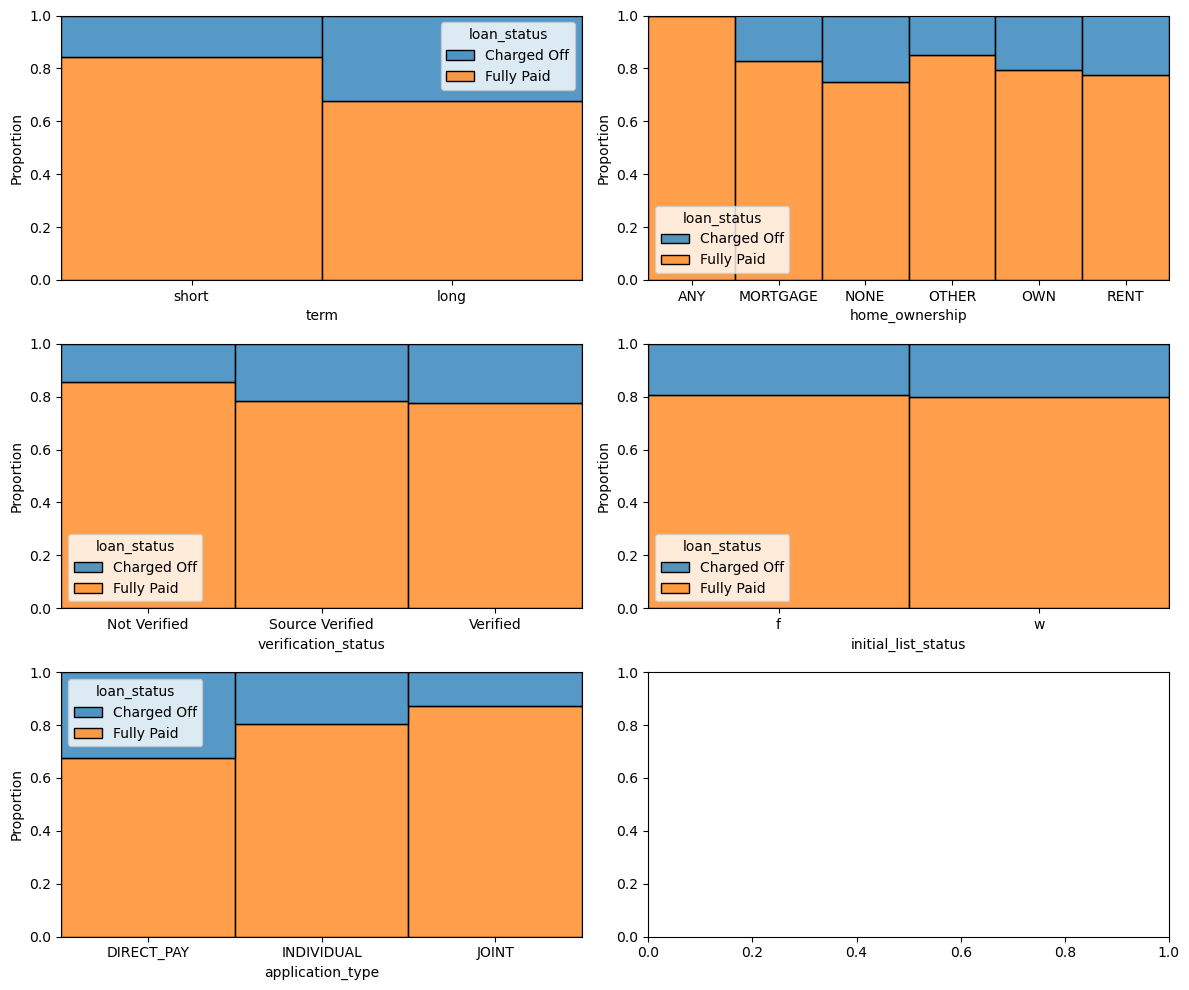

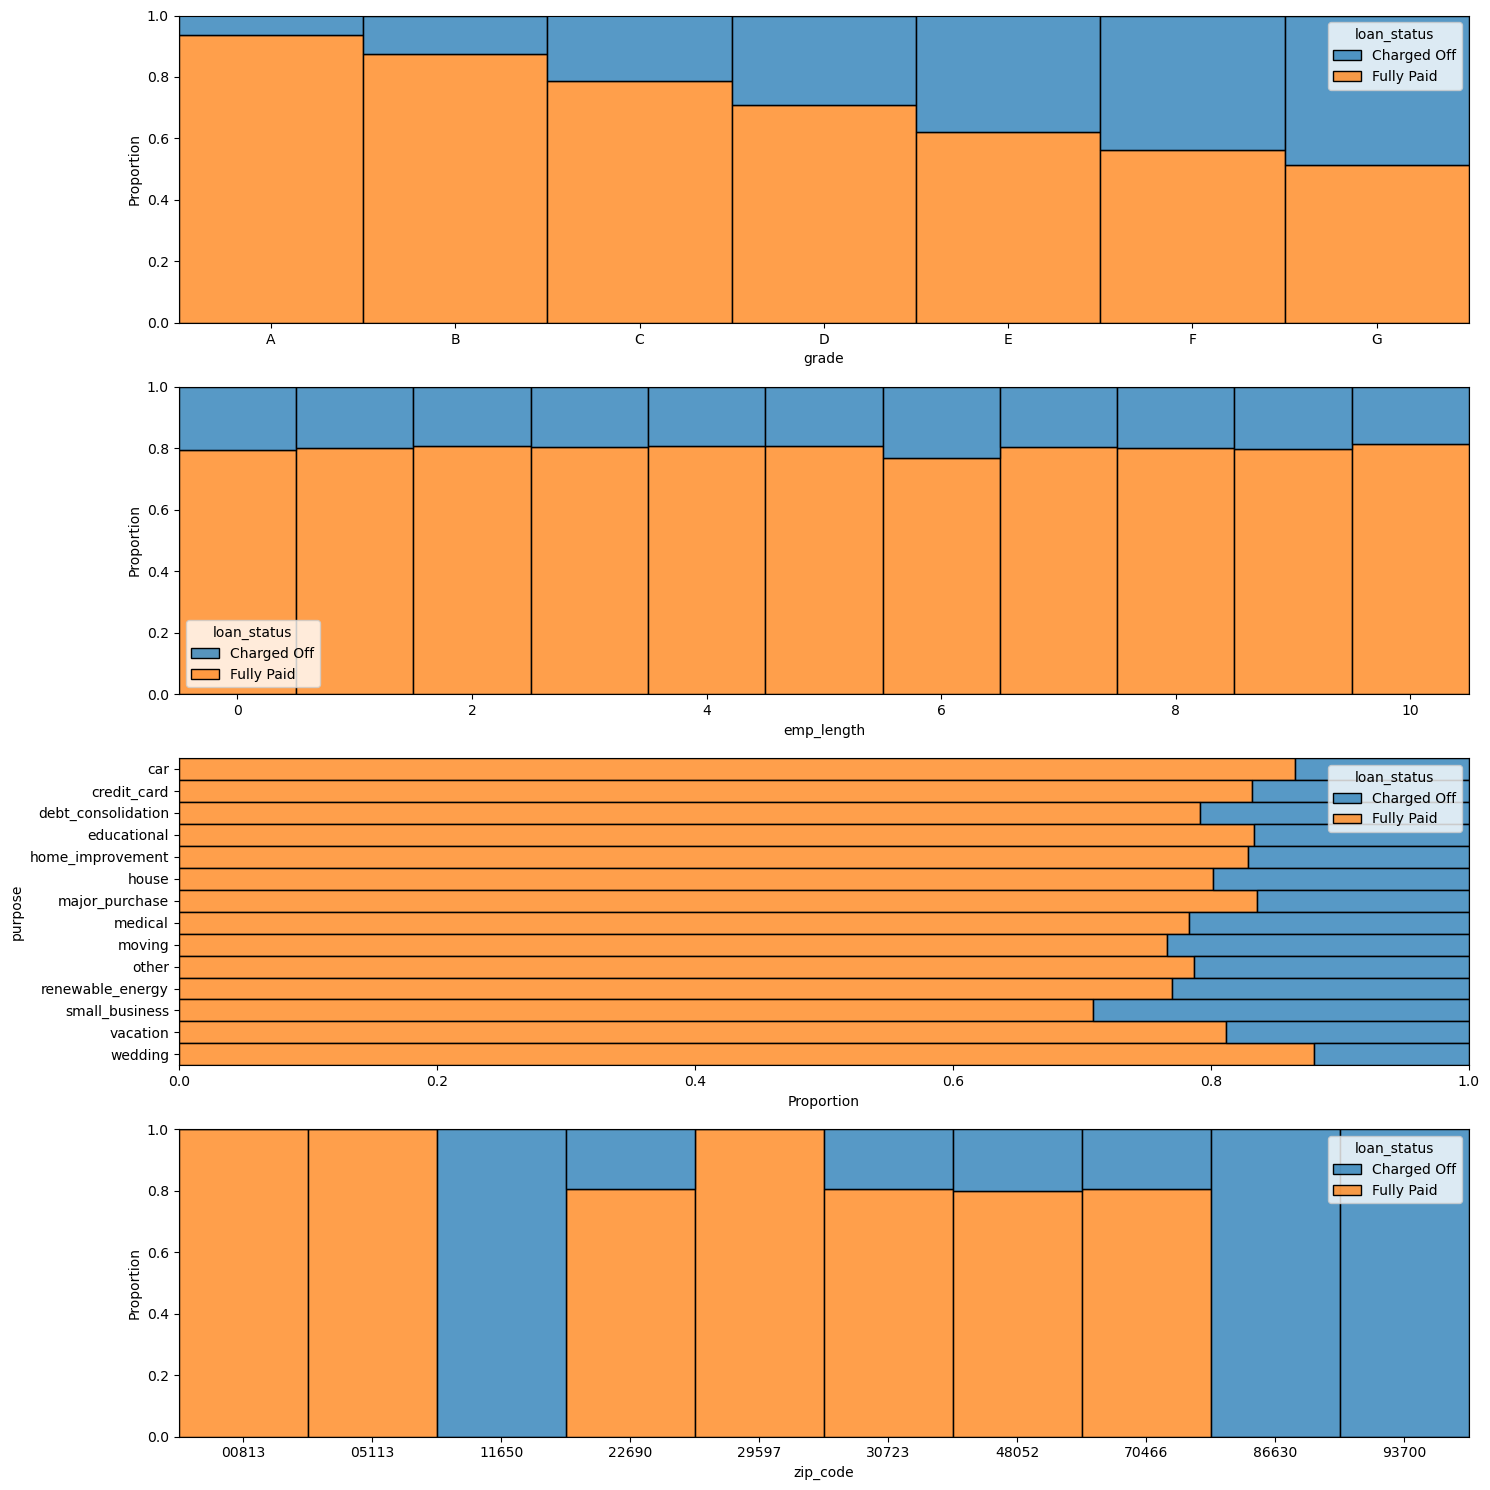

In [ ]:
fig, axs = plt.subplots(3,2,figsize=(12,10))
sns.histplot(ax=axs[0,0], data=df, x='term', hue='loan_status', stat="proportion", multiple="fill")
sns.histplot(ax=axs[0,1], data=df, x='home_ownership', hue='loan_status', stat="proportion", multiple="fill")
sns.histplot(ax=axs[1,0], data=df, x='verification_status', hue='loan_status', stat="proportion", multiple="fill")
sns.histplot(ax=axs[1,1], data=df, x='initial_list_status', hue='loan_status', stat="proportion", multiple="fill")
sns.histplot(ax=axs[2,0], data=df, x='application_type', hue='loan_status', stat="proportion", multiple="fill")
fig.tight_layout()
plt.show()

fig, axs = plt.subplots(4,1,figsize=(15,15))
sns.histplot(ax=axs[0], data=df, x='grade', hue='loan_status', stat="proportion", multiple="fill")
sns.histplot(ax=axs[1], data=df, x='emp_length', hue='loan_status', stat="proportion", multiple="fill")
sns.histplot(ax=axs[2], data=df, y='purpose', hue='loan_status', stat="proportion", multiple="fill")
sns.histplot(ax=axs[3], data=df, x='zip_code', hue='loan_status', stat="proportion", multiple="fill")
fig.tight_layout()
plt.show()

## Insight
- Having a **negative** or **bankruptcy** record **doesnt** seem to **impact** the loan getting paid back or not
- Loan taken for short term, i.e. **3 years** are most likely to be **fully paid** back
- Loan taken by people whose **house ownership** is of type **any** is on are **paid back 100%**.
- Suprisingly, loans which are **not verified** are more likely to be **paid back**
- **Initial list status** also **do not** seem to **impact loan status**
- Loan taken as **joint** application type are more likely to be **paid back**
- Loans with **grade A and B** are more likely to get paid back
- **Employment duration** **does not** seem to **impact loan status**
- Loan taken for **wedding** are more likely to be paid back
- Loan taken by people with zip code **00813 and 05113** are **fully paid** back whereas loan taken by people with zip code **11650, 86630 and 93700** are all **charged off**

In [ ]:
df.drop(columns=['any_neg_rec', 'any_bankruptcies', 'initial_list_status', 'emp_length'], inplace=True)

## 4.5. Multivariate analysis

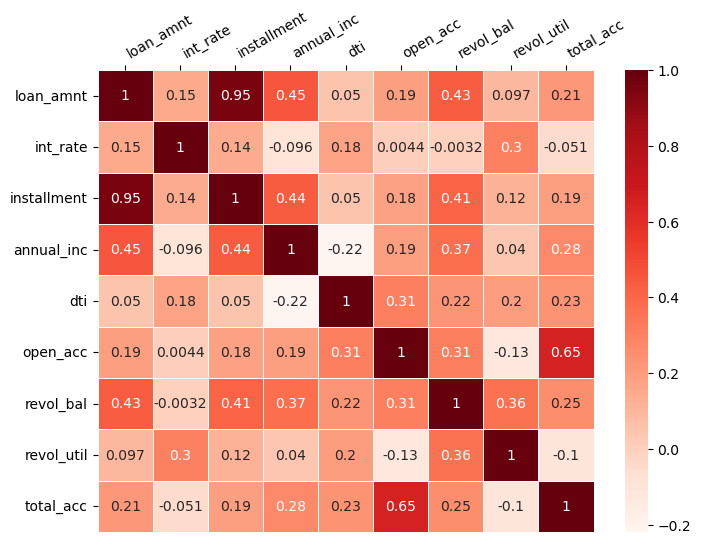

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, linewidth=0.5, cmap = "Reds", ax=ax)
ax.xaxis.tick_top()
plt.xticks(rotation=30, ha='left')
plt.show()

## Insight
- **loan amount** is highly correlated with **installment**
- There is good correlation between **loan amount - annual income**, **loan amount - revol balance**, **installment - annual income**, **installment - revol balance**, **open account - total account**

# 5. Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370106 entries, 0 to 396029
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   loan_amnt            370106 non-null  float64       
 1   term                 370106 non-null  category      
 2   int_rate             370106 non-null  float64       
 3   installment          370106 non-null  float64       
 4   grade                370106 non-null  category      
 5   home_ownership       370106 non-null  category      
 6   annual_inc           370106 non-null  float64       
 7   verification_status  370106 non-null  category      
 8   issue_d              370106 non-null  datetime64[ns]
 9   loan_status          370106 non-null  category      
 10  purpose              370106 non-null  category      
 11  dti                  370106 non-null  float64       
 12  earliest_cr_line     370106 non-null  datetime64[ns]
 13  open_acc           

The date features will not have an impact on the loan status, so i will drop ***issue_d*** and ***earliest_cr_line*** columns

In [ ]:
df.drop(columns=['issue_d', 'earliest_cr_line'], inplace=True)

## 5.1. Multicollinearity Check

In [ ]:
features_df = df.drop(columns=['loan_status']) # Drop target column
features_df.select_dtypes(include='category').columns
features_df = features_df.drop(columns=features_df.select_dtypes(include='category').columns) # Drop category columns
features_df = sm.add_constant(features_df)  # Adding a constant column for the intercept
vif_df = pd.DataFrame()
vif_df['Features'] = features_df.columns
vif_df['VIF'] = [variance_inflation_factor(features_df.values, idx) for idx in range(len(features_df.columns))]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by='VIF', ascending=False)
vif_df

,Features,VIF
0,const,24.91
1,loan_amnt,11.58
3,installment,11.04
6,open_acc,2.00
9,total_acc,1.87
7,revol_bal,1.76
4,annual_inc,1.62
8,revol_util,1.47
5,dti,1.40
2,int_rate,1.23


## Insight
- ***loan amount*** is highly correlated with ***installment*** which is also shown here by high VIF values. I will drop ***installment***

In [ ]:
features_df = features_df.drop(columns=['installment'])
features_df = sm.add_constant(features_df)  # Adding a constant column for the intercept
vif_df = pd.DataFrame()
vif_df['Features'] = features_df.columns
vif_df['VIF'] = [variance_inflation_factor(features_df.values, idx) for idx in range(len(features_df.columns))]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by='VIF', ascending=False)
vif_df

,Features,VIF
0,const,24.76
5,open_acc,2.00
8,total_acc,1.86
6,revol_bal,1.75
3,annual_inc,1.62
1,loan_amnt,1.49
7,revol_util,1.46
4,dti,1.40
2,int_rate,1.22


## Insight
- Based on the above VIF scores, I can conclude that there are no more multicolinear numerical features
- I will drop ***installment*** from the dataframe

In [ ]:
df.drop(columns=['installment'], inplace=True)

## 5.2. Encode categorical variables

In [ ]:
final_df = df.copy()
final_df.reset_index(inplace=True, drop=True)

**Sepearte out target and feature columns**

In [ ]:
X = final_df.drop(columns=['loan_status'])
y = final_df['loan_status']

**Encode target variable**

In [ ]:
y = y.replace({'Fully Paid': 0, 'Charged Off': 1}).astype(int)

**Encode features with just 2 classes as 0 or 1**

In [ ]:
X['term'] = X['term'].replace({'short': 0, 'long': 1}).astype('int8')
X['any_mort'] = X['any_mort'].astype('int8')

**One-Hot-Encoding for remaining categorical features**

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370106 entries, 0 to 370105
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   loan_amnt            370106 non-null  float64 
 1   term                 370106 non-null  int8    
 2   int_rate             370106 non-null  float64 
 3   grade                370106 non-null  category
 4   home_ownership       370106 non-null  category
 5   annual_inc           370106 non-null  float64 
 6   verification_status  370106 non-null  category
 7   purpose              370106 non-null  category
 8   dti                  370106 non-null  float64 
 9   open_acc             370106 non-null  float64 
 10  revol_bal            370106 non-null  float64 
 11  revol_util           370106 non-null  float64 
 12  total_acc            370106 non-null  float64 
 13  application_type     370106 non-null  category
 14  zip_code             370106 non-null  category
 15  

In [ ]:
categorical_columns = X.select_dtypes(include='category').columns
categorical_columns

Index(['grade', 'home_ownership', 'verification_status', 'purpose',
       'application_type', 'zip_code'],
      dtype='object')

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(X[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out(categorical_columns))
X = pd.concat([X, encoded_df], axis=1)
X.drop(columns = categorical_columns, inplace=True)
X.head()

,loan_amnt,term,int_rate,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,any_mort,...,zip_code_00813,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.0,0,11.44,117000.0,26.24,16.0,36369.0,41.8,25.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8000.0,0,11.99,65000.0,22.05,17.0,20131.0,53.3,27.0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15600.0,0,10.49,43057.0,12.79,13.0,11987.0,92.2,26.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7200.0,0,6.49,54000.0,2.60,6.0,5472.0,21.5,13.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24375.0,1,17.27,55000.0,33.95,13.0,24584.0,69.8,43.0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 5.3. Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((296084, 53), (74022, 53), (296084,), (74022,))

## 5.4. Perform data normalization/standardization
Data normalization/standardization is required so that features with higher scales do not dominate the model's performance. Hence all features should have same scale\

**Data before scaling**

In [ ]:
X_train.head()

,loan_amnt,term,int_rate,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,any_mort,...,zip_code_00813,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
133405,27000.0,1,16.29,82302.0,25.52,13.0,12014.0,48.6,29.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
365868,6000.0,0,18.55,45000.0,19.37,8.0,3219.0,73.2,11.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
71124,8975.0,0,9.71,65000.0,7.98,10.0,3932.0,34.5,58.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
33923,9600.0,0,6.62,58000.0,25.01,10.0,57236.0,36.3,19.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
30512,18000.0,0,11.53,75000.0,8.50,9.0,9916.0,35.8,17.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
min_max_scaler = MinMaxScaler()
# Fit min_max_scaler to training data
min_max_scaler.fit(X_train)
# Scale the training and testing data
X_train = pd.DataFrame(min_max_scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(min_max_scaler.transform(X_test), columns=X_test.columns)

**Data after scaling**

In [ ]:
X_train.head()

,loan_amnt,term,int_rate,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,any_mort,...,zip_code_00813,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,0.697828,1.0,0.506230,0.308276,0.372229,0.48,0.154818,0.394481,0.457627,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.144832,0.0,0.610521,0.161417,0.282526,0.28,0.041481,0.594156,0.152542,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.223173,0.0,0.202584,0.240157,0.116394,0.36,0.050669,0.280032,0.949153,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.239631,0.0,0.059991,0.212598,0.364790,0.36,0.737568,0.294643,0.288136,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.460829,0.0,0.286571,0.279528,0.123979,0.32,0.127782,0.290584,0.254237,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


**Check for imbalance in target class**

In [ ]:
y_train.value_counts(normalize=True)*100

loan_status
0    80.249186
1    19.750814
Name: proportion, dtype: float64

We can see a clear imbalance in the target class with **1** being **~20%** and **0** being **~80%**. Hence, I will use **SMOTE** to fix this imbalance

In [ ]:
sm = SMOTE(random_state=0)
X_train, y_train = sm.fit_resample(X_train, y_train)
y_train.value_counts(normalize=True)*100

loan_status
0    50.0
1    50.0
Name: proportion, dtype: float64

# 6. Build Logistic Regression model

**Train the model**

In [ ]:
model = LogisticRegression(solver='lbfgs', max_iter=300)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)

**Classification metrics and confusion matrix for Training data**

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80    237605
           1       0.80      0.82      0.81    237605

    accuracy                           0.81    475210
   macro avg       0.81      0.81      0.81    475210
weighted avg       0.81      0.81      0.81    475210



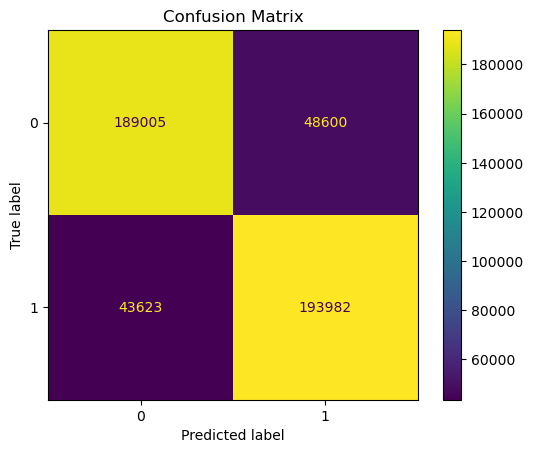

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

**Model prediction**

In [ ]:
y_test_pred = model.predict(X_test)

**Classification metrics and confusion matrix for Testing data**

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.80      0.86     59619
           1       0.49      0.81      0.61     14403

    accuracy                           0.80     74022
   macro avg       0.72      0.80      0.74     74022
weighted avg       0.86      0.80      0.82     74022



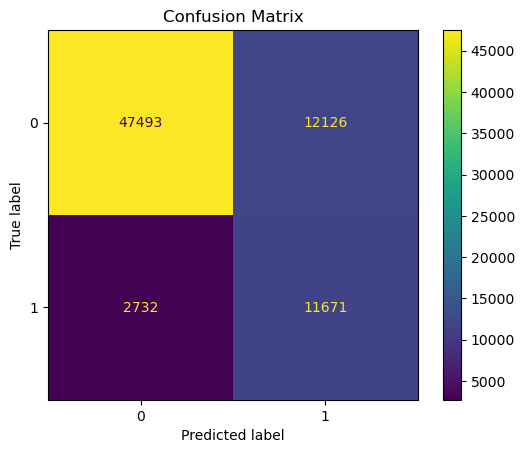

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

## Insight
- Recall is high indicating that the model is able to identify 80% of the actual defaulters and 80% of non-defaulting customers
- Precision for class 1 (defaulters) is low. Of all the predicted defaulters, only 50% are actual defaulters
- With this model there is a risk of denying loans to deserving customers due to low precision score for defaulters

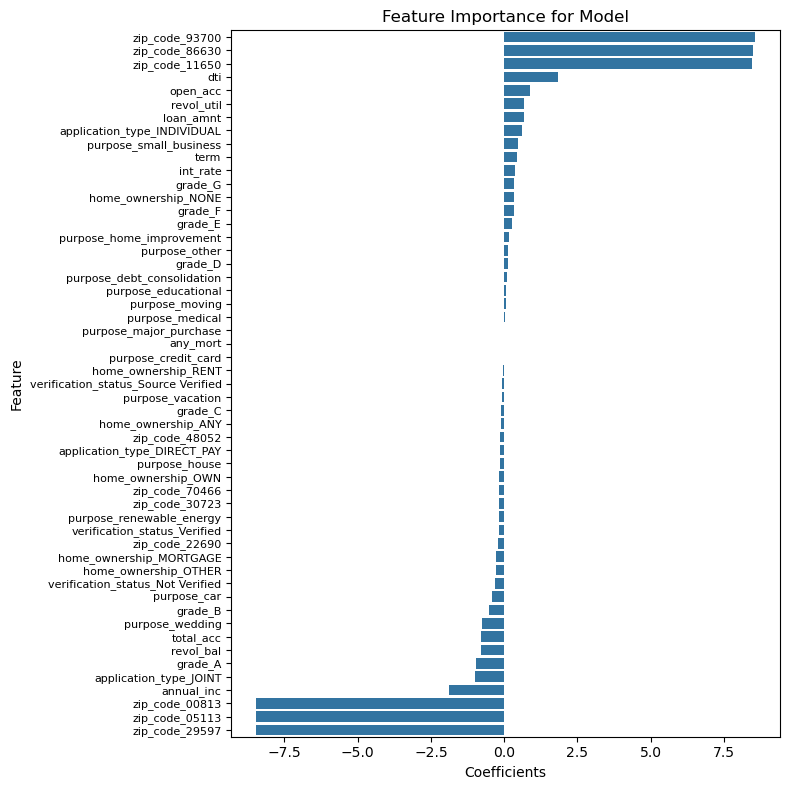

In [ ]:
feature_imp = pd.DataFrame({'Columns':X_train.columns, 'Coefficients':model.coef_[0]}).round(2).sort_values('Coefficients', ascending=False)

plt.figure(figsize=(8,8))
sns.barplot(data=feature_imp, y = 'Columns', x =  'Coefficients')
plt.title("Feature Importance for Model")
plt.yticks(fontsize=8)
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Insight
- The features **zip_code_29597, zip_code_05113, zip_code_00813, annual_inc and application_type_joint** have got high **positive weightage** and features **zip_code_86630, zip_code_11650, zip_code_93700, dti and open_acc** have got high **negative weightage** indicating their major contribution towards target variable

### ROC and AUC

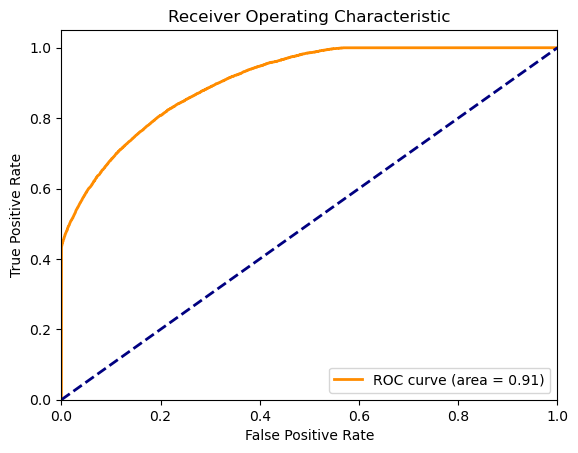

In [ ]:
# Predict probabilities for the test set
probs = model.predict_proba(X_test)[:,1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Insight
- ROC curve illustrates the trade off between TPR(True Positive Rate) and FPR(False Positive Rate) for various thresholds
- The AU-ROC value of 0.91 signifies that the model is able to differenciate well between the two classes
- Let us also look at PR Curve(Precision Recall Curve)

### Precision Recall Curve

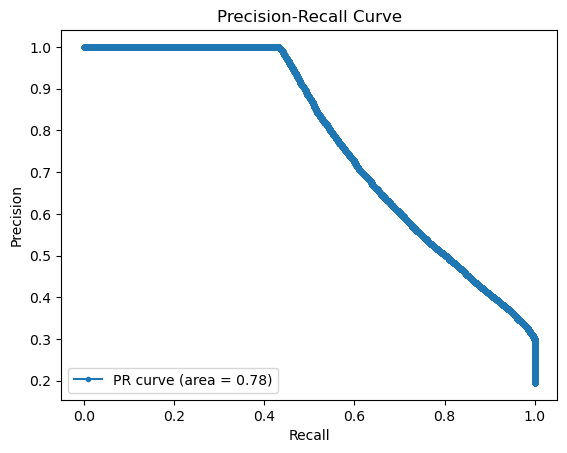

In [ ]:
precision, recall, thr = precision_recall_curve(y_test, probs)

# Area under Precision Recall Curve
apc = average_precision_score(y_test, probs)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.', label='PR curve (area = %0.2f)' % apc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

### Insight
- PR curve illustrates the trade off between Precision and Recall for various thresholds
- The model has a AU-PRC value of 0.78 which is not that high. It is better than the random model which has a AU-PRC value of 0.5.
- This clearly indicates that we simply cannot conclude on the model's performance from just the ROC curve.

**Find the threshold where precision and recall meet**

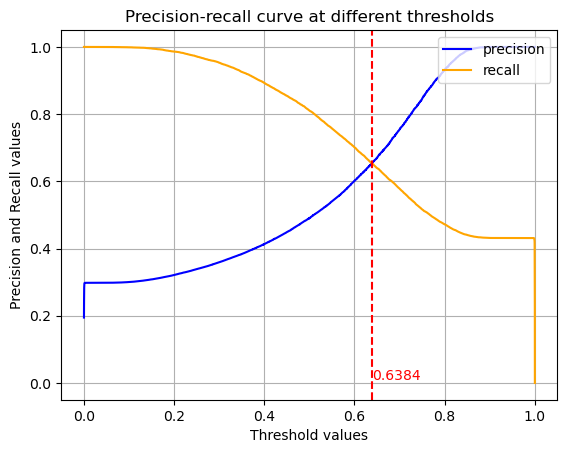

In [ ]:
plt.figure()
plt.plot(thr,precision[0:len(thr)],label='precision',color='blue')
plt.plot(thr,recall[0:len(thr)],label='recall',color='orange')
intersection_thr = thr[np.where(precision == recall)[0][0]].round(4)
plt.axvline(intersection_thr, linestyle='--', color='red')
plt.text(intersection_thr, 0.01, str(intersection_thr), ha='left', color='red')
plt.title("Precision-recall curve at different thresholds")
plt.xlabel("Threshold values")
plt.ylabel("Precision and Recall values")
plt.legend(loc="upper right")
plt.grid()
plt.show()

In [ ]:
y_pred = model.predict_proba(X_test)[:,1]
threshold_considered = intersection_thr
y_pred_custom = (y_pred>threshold_considered).astype('int')
print(classification_report(y_test,y_pred_custom))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     59619
           1       0.65      0.65      0.65     14403

    accuracy                           0.87     74022
   macro avg       0.78      0.78      0.78     74022
weighted avg       0.87      0.87      0.87     74022



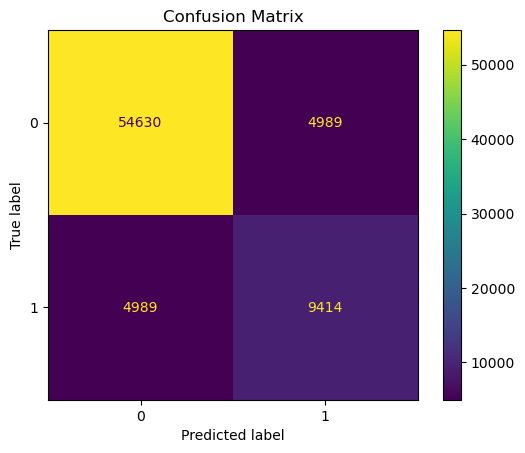

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_custom)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

## Insight
- With the new threshold, precision for class 1 (defaulters) has increased at a cost of decrease in Recall
- The overall F1-score and accuracy has increased

# 7. Insights

- **80%** of the customers have fully paid their loan and 20% are defaulters
- Loan amount and installment are highly **correlated** as it is obvious that high loan amount will have high installment amount
- Loan taken for short term, i.e. **3 years** are most likely to be **fully paid back**
- Most of the people have home ownership as **mortgage**
- Suprisingly, loans which are **not verified** are more likely to be **paid back**
- Loan taken as **joint** application type are more likely to be **paid back**
- People with **grade A** are more likely to fully pay their loan
- Loan taken for **wedding** are more likely to be paid back
- People from zip code **00813,  05113** fully pay back their loans whereas people from zip code **11650, 86630, 93700** are all defaulters
- The features **zip_code_29597, zip_code_05113, zip_code_00813, annual_inc, application_type_joint, zip_code_86630, zip_code_11650, zip_code_93700, dti, open_acc** affected the model outcome heavily
- As per the ROC curve and AU-ROC value of 0.91, the model is able to differenciate well between the defaulters and non-defaulters
- As per the PRC and AU-PRC value of 0.97, the model is able to return accurate results as well as return majority of all positive results(high recall)

 # 8. Recommendation

- The bank can provide more short term loans, i.e. for 3 years, without much risk
- Provide more joint loans and scrutinize more individual and direct pay application types
- Analyze carefully the loan applications of customers with grades D, E, F and G. Do not provide them loans or provide smaller loans to these customers
- Reduce the loan given for small bussiness or analyze their application in detail before giving out loan to small bussiness
- Do not provide loans to customers with zip code 11650, 86630, 93700